# Comparing two networks

## Necessary imports

In [4]:
import torch
import torch.nn as nn
from utils import networks, plotting_tools, engine, messing
from torchvision import datasets, models, transforms

## Hyperparameters setting

In [7]:
data_path = "../Data" #Include here your data path - torchvision based -

BATCH_SIZE = 64 #Regular parameters
LEARNING_RATE = 0.01
NUM_EPOCH = 5
CRITERION = nn.CrossEntropyLoss() #CrossEntropy loss convey a post softmax probability rating, rather than a feature difference analysis.

train_dataset_MNIST = datasets.MNIST(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_MNIST = datasets.MNIST(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_MNIST = torch.utils.data.DataLoader(dataset=train_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(dataset=test_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)

## Testing "Our" Model

The backbone of the analytic code can be found in the $engine$ module. Other modules performs different purposes, often in analysis or network shifting.

Basic netwrorks are included in the $networks$ package.

Initialization and training shifting is included in the $messing$ package.

In [11]:
model_1 = networks.GenResNet(8, 64, residual = True) #Test Networks
model_2 = networks.GenResNet(8, 64, residual = True) #Function application networks

messing.zero_init(model_2) #Performs the zero initializitation described in the paper

if(torch.cuda.is_available()):
    model_1 = model_1.cuda()
    model_2 = model_2.cuda()

output_value = engine.resnet_compare(model_1, model_2, nb_epochs=NUM_EPOCH, LEARNING_RATE=LEARNING_RATE,\
                                     CRITERION=CRITERION, train_loader=train_loader_CIFAR10, test_loader=test_loader_CIFAR10)

Starting epoch n°0
Done: 99%, model1: 9.95%, model2: 43.25%, loss1: nan, loss2: 1.2659 
Ending epoch n°0
Starting epoch n°1
Done: 99%, model1: 9.95%, model2: 54.01%, loss1: nan, loss2: 0.8583 
Ending epoch n°1
Starting epoch n°2
Done: 99%, model1: 9.95%, model2: 49.23%, loss1: nan, loss2: 1.2143 
Ending epoch n°2
Starting epoch n°3
Done: 99%, model1: 9.95%, model2: 57.68%, loss1: nan, loss2: 0.7306 
Ending epoch n°3
Starting epoch n°4
Done: 99%, model1: 9.95%, model2: 57.48%, loss1: nan, loss2: 1.1687 
Ending epoch n°4


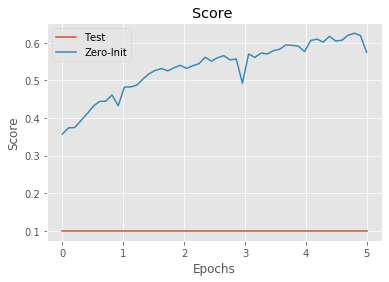

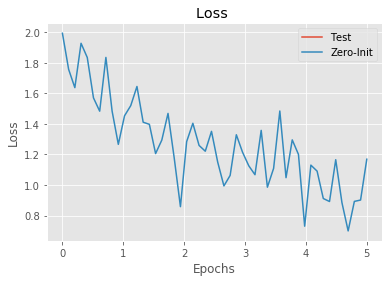

In [13]:
label_list = ["Score","Loss"]
name_list = ["Test", "Zero-Init"]


plotting_tools.comparaison_plot(output_value, label_list, name_list, NB_EPOCH=NUM_EPOCH)

We can observe that the zero initialization allows the training to happen, even for deep networks. It forwards our idea of a steeper loss space at zero-initialization

## ResNet18 Model

In [14]:
model_1 = models.resnet18(num_classes = 10) #Test Networks
model_2 = models.resnet18(num_classes = 10) #Function application networks

messing.zero_init(model_2) #Performs the zero initializitation described in the paper

if(torch.cuda.is_available()):
    model_1 = model_1.cuda()
    model_2 = model_2.cuda()

output_value = engine.resnet_compare(model_1, model_2, nb_epochs=NUM_EPOCH, LEARNING_RATE=LEARNING_RATE,\
                                     CRITERION=CRITERION, train_loader=train_loader_CIFAR10, test_loader=test_loader_CIFAR10)

Starting epoch n°0
Done: 99%, model1: 47.67%, model2: 56.25%, loss1: 1.4754, loss2: 1.2807 
Ending epoch n°0
Starting epoch n°1
Done: 99%, model1: 52.27%, model2: 60.77%, loss1: 1.3481, loss2: 1.3746 
Ending epoch n°1
Starting epoch n°2
Done: 99%, model1: 58.43%, model2: 62.05%, loss1: 1.5029, loss2: 1.1964 
Ending epoch n°2
Starting epoch n°3
Done: 99%, model1: 58.15%, model2: 62.27%, loss1: 1.0825, loss2: 0.9922 
Ending epoch n°3
Starting epoch n°4
Done: 99%, model1: 60.75%, model2: 67.28%, loss1: 0.5707, loss2: 0.4758 
Ending epoch n°4


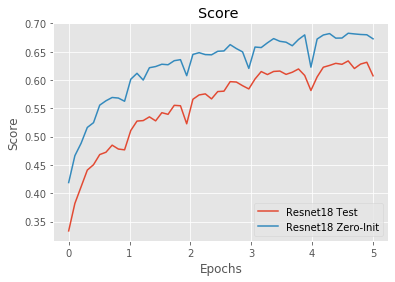

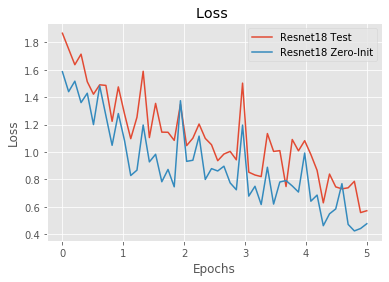

In [15]:
label_list = ["Score","Loss"]
name_list = ["Resnet18 Test", "Resnet18 Zero-Init"]


plotting_tools.comparaison_plot(output_value, label_list, name_list, NB_EPOCH=NUM_EPOCH)

On a fairly common network structure (ResNet18), our initialization procedure performs better